# 1. 클래스
 - 클래스란? **객체의 표현을** 위한 코드집합 묶음으로 반복 작업을 편하게만들고, 코드 재활용성을 높임

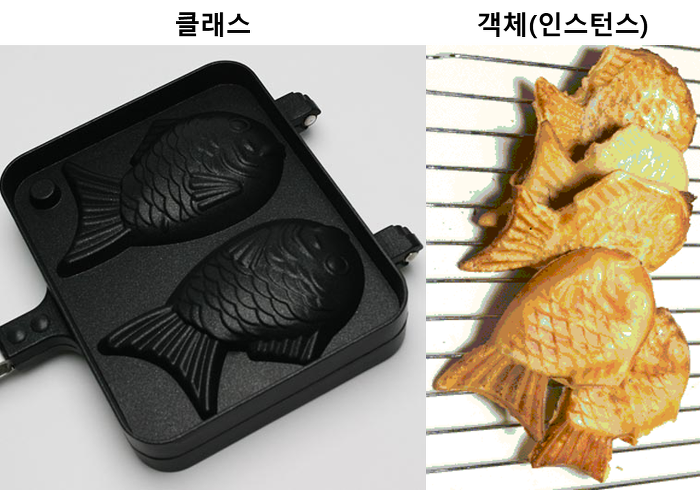

## 1-1. 클래스의 기본 형태
 - "class 클래스명(변수):" 형태로 선언하며 사용할땐 "클래스(값)" 으로 활용 

In [7]:
class Note(object):
    def __init__(self, text, writer=None):
        self.contents = text
        self.writer = writer
        self.date = None

    def write_contents(self, contents):
        self.contents = contents

    def get_number_of_lines(self):
        return self.contents.count("\n")

    def get_number_of_characters(self):
        return len(self.contents)

    def remove(self):
        self.contents = "삭제된 노트입니다."

    def __str__(self):
        return self.contents

## 1-2. 클래스의 활용

In [34]:
myNote = Note("승급전임?", writer="ktlim")
print(myNote.contents)
myNote.write_contents("트롤 가즈아")
print(myNote.__str__())
print(myNote.contents)
print(myNote.writer)
myNote.writer = "경태"
print(myNote.writer)

myNote2 = Note("2번째장입니다.", writer="소울")
print(myNote2.writer)


승급전임?
트롤 가즈아
트롤 가즈아
ktlim
경태
소울


## 1-2. 클래스 내의 인스턴스

In [5]:
class NoteBook(object):
    def __init__(self, name):
        self.name = name
        self.pages = 0
        self.notes = {}

    def add_note(self, note, page_number=0):
        if len(self.notes.keys()) < 300:
            if page_number == 0:
                if self.pages < 301:
                    self.notes[self.pages] = note
                    self.pages += 1
                else:
                    for i in range(300):
                        if i not in list(self.notes.keys()):
                            self.notes[self.pages] = note
            else:
                if page_number not in self.notes.keys():
                    self.notes[page_number] = note
                else:
                    print("해당 페이지에는 이미 노트가 존재합니다.")
        else:
            print("더 이상 노트를 추가하지 못합니다.")

    def remove_note(self, page_number):
        del self.notes[page_number]

    def get_number_of_all_lines(self):
        result = 0
        for k in self.notes.keys():
            result += self.notes[k].get_number_of_lines()
        return result

    def get_number_of_all_characters(self):
        result = 0
        for k in self.notes.keys():
            result += self.notes[k].get_number_of_characters()
        return result

    def get_number_of_all_pages(self):
        return len(self.notes.keys())

    def __str__(self):
        return self.name

## 1-3 클래스 내의 인스턴스 활용

In [35]:
good_sentence = """세상사는 데 도움이 되는 명언, 힘이 되는 명언, 용기를 주는 명언, 위로가 되는 명언, 좋은 명언 모음 100가지. 자주 보면 좋을 것 같아서 선별했습니다."""
note_1 = Note(good_sentence)

print(note_1)
note_1.remove()
print(note_1)


good_sentence = """삶이 있는 한 희망은 있다. - 키케로 """
note_2 = Note(good_sentence, '키케로')

good_sentence = """하루에 3시간을 걸으면 7년 후에 지구를 한 바퀴 돌 수 있다. - 사무엘 존슨"""
note_3 = Note(good_sentence)

good_sentence = """행복의 문이 하나 닫히면 다른 문이 열린다. 그러나 우리는 종종 닫힌 문을 멍하니 바라보다가 우리를 향해 열린 문을 보지 못하게 된다. - 헬렌 켈러"""
note_4 = Note(good_sentence)


wise_saying_notebook = NoteBook("명언 노트")
wise_saying_notebook.add_note(note_1)
print(wise_saying_notebook.get_number_of_all_pages())

wise_saying_notebook.add_note(note_2)
print(wise_saying_notebook.get_number_of_all_pages())

wise_saying_notebook.add_note(note_3)
wise_saying_notebook.add_note(note_4)
print(wise_saying_notebook.get_number_of_all_pages())
print(wise_saying_notebook.get_number_of_all_characters())

세상사는 데 도움이 되는 명언, 힘이 되는 명언, 용기를 주는 명언, 위로가 되는 명언, 좋은 명언 모음 100가지. 자주 보면 좋을 것 같아서 선별했습니다.
삭제된 노트입니다.
1
2
4
159


# 1-4 클래스의 상속

In [23]:
class Person(object):                       # 부모 클래스 Person 선언
    def __init__(self, name, age, gender):
        self.name = name
        self.age = age
        self.gender = gender

    def about_me(self):                     # 메서드 선언
        print("저의 이름은", self.name, "이고요, 제 나이는", str(self.age), "살입니다.")

In [37]:
myPerson = Person("코딩노예1", "25", "모름")
myPerson.about_me()

저의 이름은 코딩노예1 이고요, 제 나이는 25 살입니다.


In [24]:
class Employee(Person):                                             # 부모 클래스 Person으로부터 상속
    def __init__(self, name, age, gender, salary, hire_date):
        super().__init__(name, age, gender)                         # 부모 객체 사용
        self.salary = salary
        self.hire_date = hire_date                                  # 속성값 추가

    def do_work(self):                                              # 새로운 메서드 추가
        print("열심히 일을 한다.")

    def about_salary(self):                                             # 부모 클래스 함수 재정의
        super().about_me()                                          # 부모 클래스 함수 사용
        print("제 급여는", self.salary, "원이고, 제 입사일은", self.hire_date, "입니다.")

In [38]:
myPerson = Person("코딩노예1", "25", "모름")
myEmployee = Employee("코딩천재2", "26", "모름", "월 1000만", "2022")

In [39]:
print(myPerson.about_me())


저의 이름은 코딩노예1 이고요, 제 나이는 25 살입니다.
None


In [28]:
print(myEmployee.about_me())
print(myEmployee.about_salary())

저의 이름은 코딩노예2 이고요, 제 나이는 26 살입니다.
None
저의 이름은 코딩노예2 이고요, 제 나이는 26 살입니다.
제 급여는 월 1000만 원이고, 제 입사일은 2022 입니다.
None
